In [5]:
from datasets import load_dataset
from IPython.display import display

In [6]:
ds = load_dataset("microsoft/cats_vs_dogs")
display(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [8]:
ds["train"][1]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x281>,
 'labels': 0}

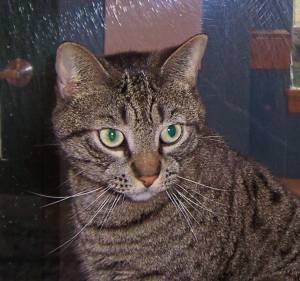

In [9]:
ds["train"][1]["image"]

In [10]:
ds["train"][1]["labels"]

0

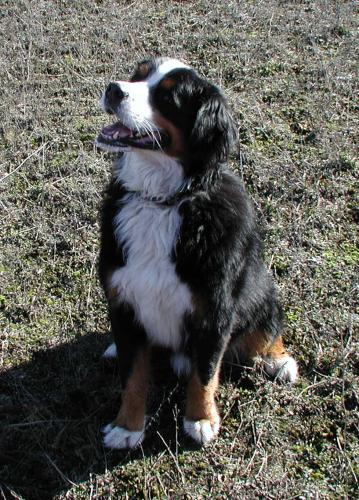

In [11]:
ds["train"][20000]["image"]

In [12]:
ds["train"][20000]["labels"]


1

In [14]:
import pandas as pd

labels = [ds["train"][i]["labels"] for i in range(len(ds["train"]))]

label_series = pd.Series(labels)

label_counts = label_series.value_counts()

label_counts

0    11741
1    11669
Name: count, dtype: int64

In [15]:
train_sample = ds["train"].shuffle(seed=271828)

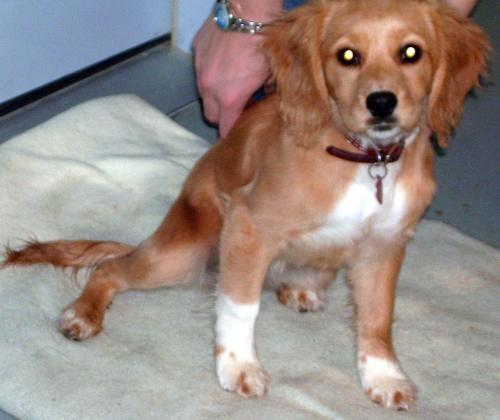

In [16]:
train_sample[0]["image"]

In [17]:
import numpy as np

In [18]:
image_array = np.array(train_sample[0]["image"])
image_shape = image_array.shape
print(image_shape)

(420, 500, 3)


In [19]:
image_shape = np.array(train_sample[1]["image"]).shape
print(image_shape)


(375, 500, 3)


In [20]:
X_train = [np.array(img) for img in train_sample["image"]]

y_train = np.array(train_sample["labels"])

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=271828
)

len(X_train), len(X_valid), len(y_train), len(y_valid)

(18728, 4682, 18728, 4682)

In [24]:
from PIL import Image

In [25]:
X_train_resized = [
    np.array(Image.fromarray(img).convert("L").resize((256, 256))) for img in X_train
]

X_valid_resized = [
    np.array(Image.fromarray(img).convert("L").resize((256, 256))) for img in X_valid
]

X_train_resized = np.array(X_train_resized)
X_valid_resized = np.array(X_valid_resized)

X_train_resized.shape, X_valid_resized.shape

((18728, 256, 256), (4682, 256, 256))

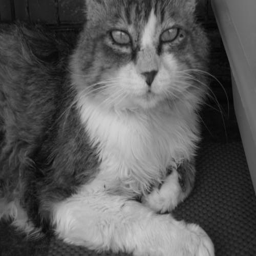

In [26]:
Image.fromarray(X_train_resized[1])

In [27]:
X_train_resized = X_train_resized / 255.0
X_valid_resized = X_valid_resized / 255.0

In [33]:
import tensorflow as tf

In [32]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense, Flatten

In [36]:
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Flatten(input_shape=(256, 256)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    optimizer = tf.keras.optimizers.Adam(3e-4)
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train_resized,
        y_train,
        epochs=20,
        validation_data=(X_valid_resized, y_valid),
        batch_size=64,
    )


c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 108s 356ms/step - accuracy: 0.5177 - loss: 1.9029 - val_accuracy: 0.5596 - val_loss: 0.6785
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 91s 309ms/step - accuracy: 0.5531 - loss: 0.6970 - val_accuracy: 0.5976 - val_loss: 0.6737
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 88s 299ms/step - accuracy: 0.5686 - loss: 0.6831 - val_accuracy: 0.5946 - val_loss: 0.6648
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 89s 302ms/step - accuracy: 0.5920 - loss: 0.6689 - val_accuracy: 0.5555 - val_loss: 0.6733
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 88s 299ms/step - accuracy: 0.5697 - loss: 0.6757 - val_accuracy: 0.5867 - val_loss: 0.6728
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 87s 297ms/step - accuracy: 0.5420 - loss: 0.6855 - val_accuracy: 0.5538 - val_loss: 0.6794
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 86s 294ms/step - accuracy: 0.5519 - loss: 0.6832 - val_accuracy: 0.5705 - val_loss: 0.6722
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 87s 295ms/step - accuracy: 0.5706 - loss: 